In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#matplotlib inline

(768, 9)
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI    pedigree         Age     Outcome  
count  768.000000  768.000000  768.000000  768.000000  
mean    31.992578    0.471876   33.240885    0.348958  
std      7.884160    0.331329   11.760232    0.476951  
min      0.000000    0.078000   21.000000    0.000000  
25%     27.300000    0.243

C:\Users\Dr.PVVK\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


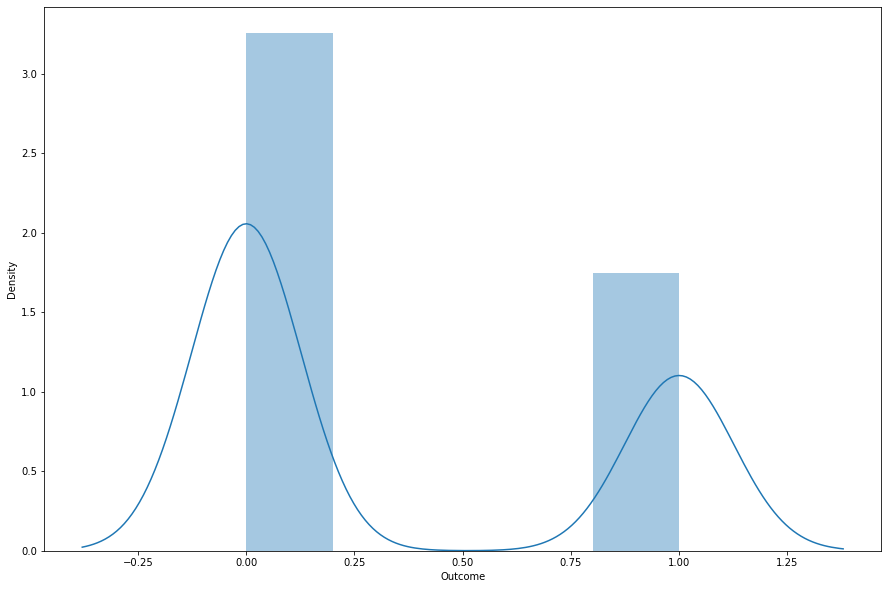

In [2]:
#PATH= '/Users\Dr.PVVK\Desktop\SubJect_1_2020\lab experiments python\lab experiments python\logistic regression'
#dataset = pd.read_csv(PATH+'/diabetes.csv')
dataset = pd.read_csv('diabetes.csv')
print(dataset.shape)
print(dataset.describe())
print(dataset.isnull().any())
dataset = dataset.fillna(method='ffill')
X = dataset[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'pedigree', 'Age']].values
y = dataset['Outcome'].values
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(dataset['Outcome'])

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
#y_test

# import the class
# instantiate the model (using the default parameters)

In [5]:
logreg = LogisticRegression(tol=0.0001,random_state=None, solver='saga', max_iter=300, multi_class='auto')
#logreg = LogisticRegression()

# A Library for Large Linear Classification

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#

# fit the model with data

In [6]:
logreg.fit(X_train,y_train)

C:\Users\Dr.PVVK\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(max_iter=300, solver='saga')

In [7]:
y_pred=logreg.predict(X_test)

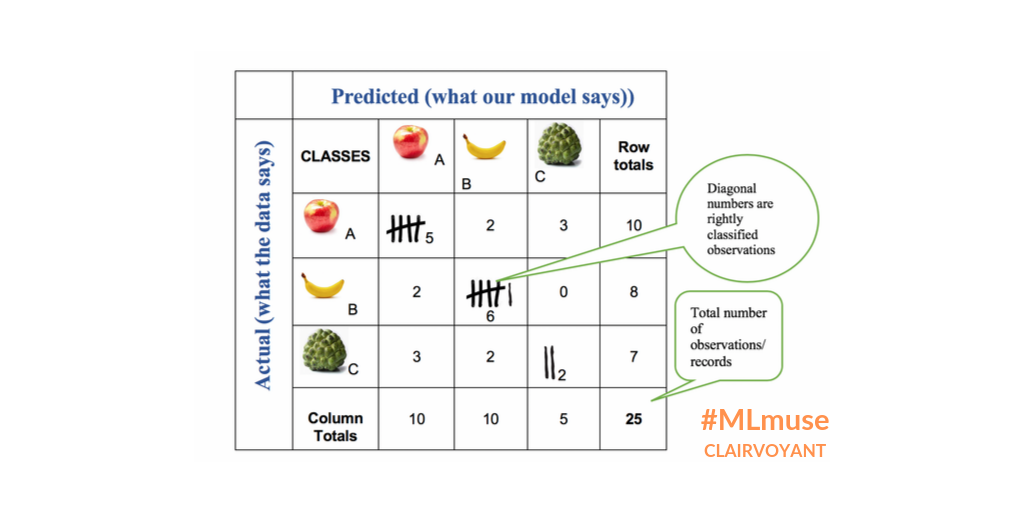

In [8]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [9]:
y_test.shape

(154,)

Text(0.5, 257.44, 'Predicted label')

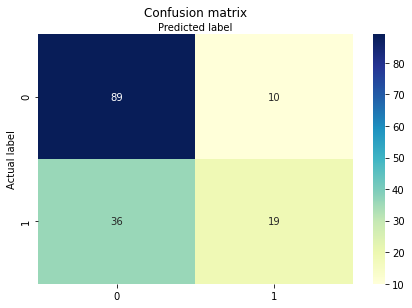

In [10]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

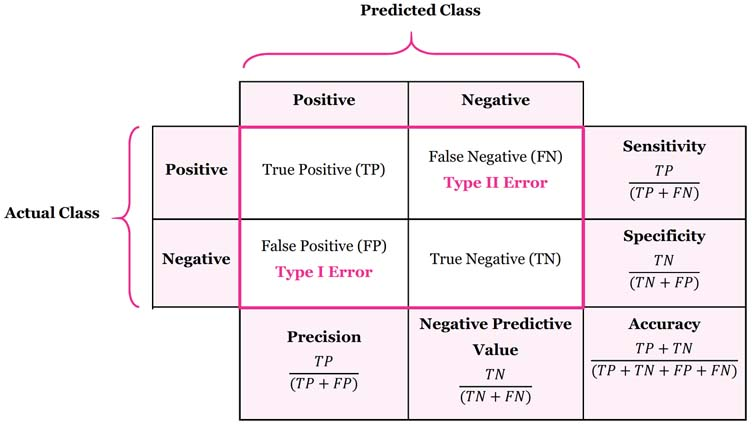

In [11]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7012987012987013
Precision: 0.6551724137931034
Recall: 0.34545454545454546


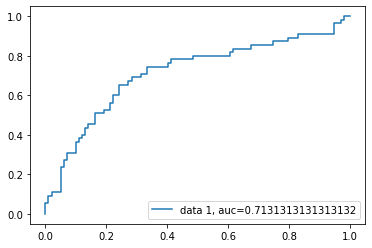

In [12]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()